/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - accuracy: 0.2981 - loss: 2.7888 - val_accuracy: 0.3578 - val_loss: 2.2693
Epoch 2/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.4011 - loss: 2.2616 - val_accuracy: 0.4335 - val_loss: 2.0218
Epoch 3/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.4853 - loss: 1.9904 - val_accuracy: 0.5203 - val_loss: 1.8376
Epoch 4/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.5334 - loss: 1.7910 - val_accuracy: 0.6194 - val_loss: 1.6235
Epoch 5/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.5892 - loss: 1.6673 - val_accuracy: 0.6388 - val_loss: 1.4792
Epoch 6/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - accuracy: 0.6309 - loss: 1.5116 - val_accuracy: 0.6867 - val_loss: 1.3480
Epoch 7/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.6679 - loss: 1.3786 - val_accuracy: 0.6984 - val_loss: 1.2711
Epoch 8/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.6773 - loss: 1.3291 - va

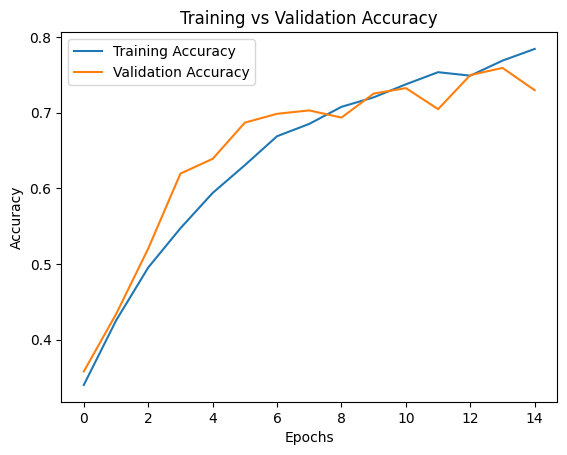

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam

num_words = 10000
max_len = 500

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words)

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

num_classes = np.max(y_train) + 1

model = Sequential([
    Embedding(input_dim=num_words, output_dim=256, input_length=max_len),
    GlobalAveragePooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train,
    y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.2
)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

predictions = model.predict(x_test)
print("Predicted label:", np.argmax(predictions[0]))
print("Actual label:", y_test[0])

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()